In [1]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np
import os
import cv2 as cv
from cv2.data import haarcascades
import matplotlib.pyplot as plt

In [2]:
# Create a function to display 5 images
def display_images(images, titles):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()

Number of yawn images: 723
Number of no yawn images: 725


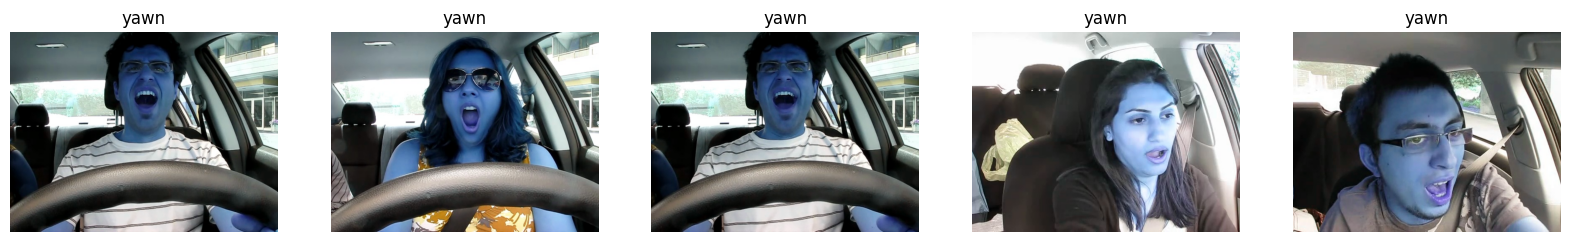

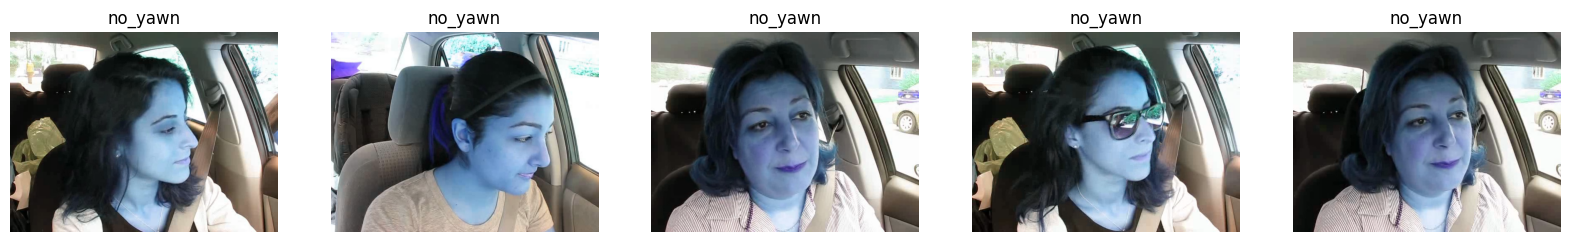

In [20]:
yawn = []
no_yawn = []

# Load the images and labels
for im in os.listdir('data/dataset/yawn'):
    img = cv.imread('data/dataset/yawn/' + im)
    yawn.append(img)

for im in os.listdir('data/dataset/no_yawn'):
    img = cv.imread('data/dataset/no_yawn/' + im)
    no_yawn.append(img)

print('Number of yawn images:', len(yawn))
print('Number of no yawn images:', len(no_yawn))

# Display the first 5 images
display_images(yawn[:5], ['yawn']*5)
display_images(no_yawn[:5], ['no_yawn']*5)

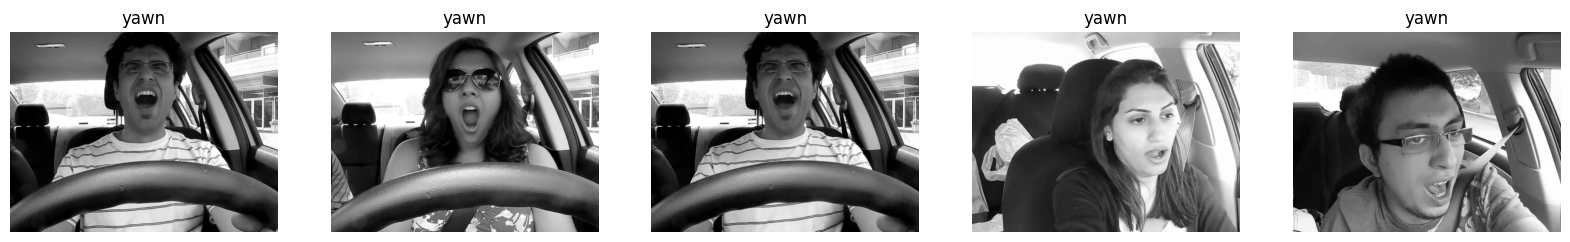

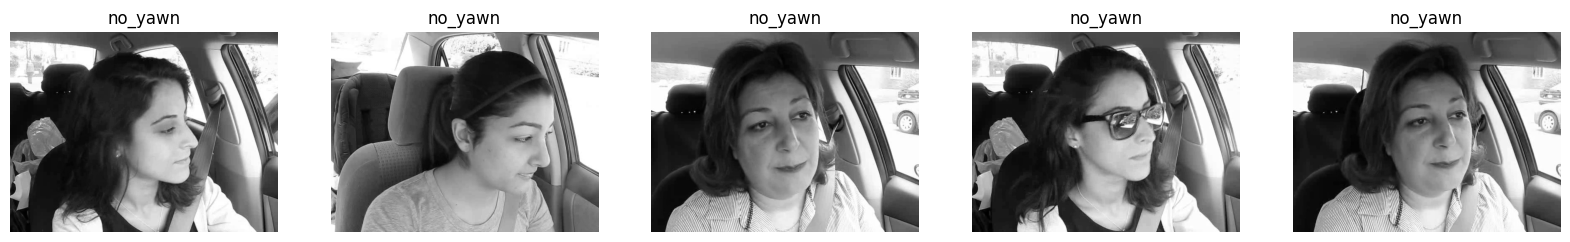

In [4]:
# Convert the images to grayscale
yawn_gray = [cv.cvtColor(img, cv.COLOR_BGR2GRAY) for img in yawn]
no_yawn_gray = [cv.cvtColor(img, cv.COLOR_BGR2GRAY) for img in no_yawn]

# Display the first 5 grayscale images
display_images(yawn_gray[:5], ['yawn']*5)
display_images(no_yawn_gray[:5], ['no_yawn']*5)

In [5]:
# Load the face cascade
face_cascade = cv.CascadeClassifier(haarcascades + 'haarcascade_frontalface_default.xml')

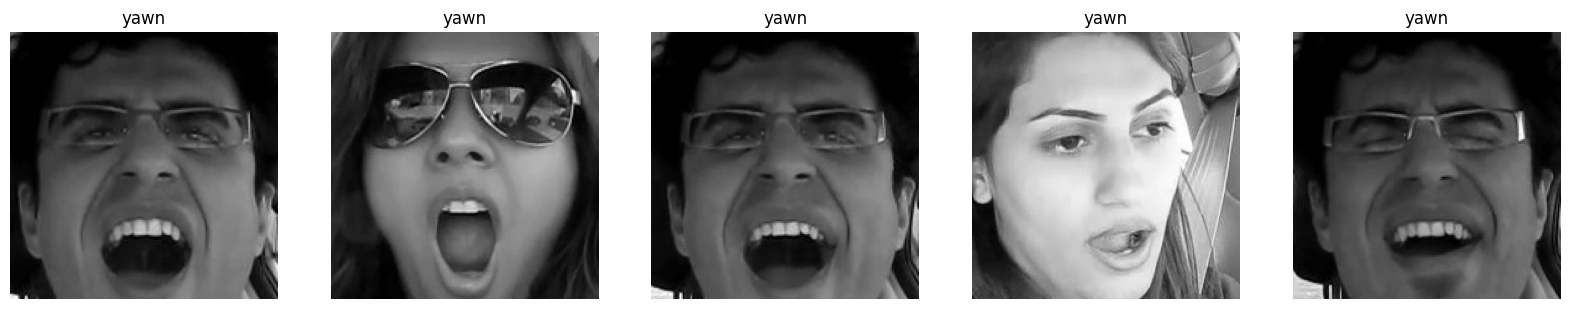

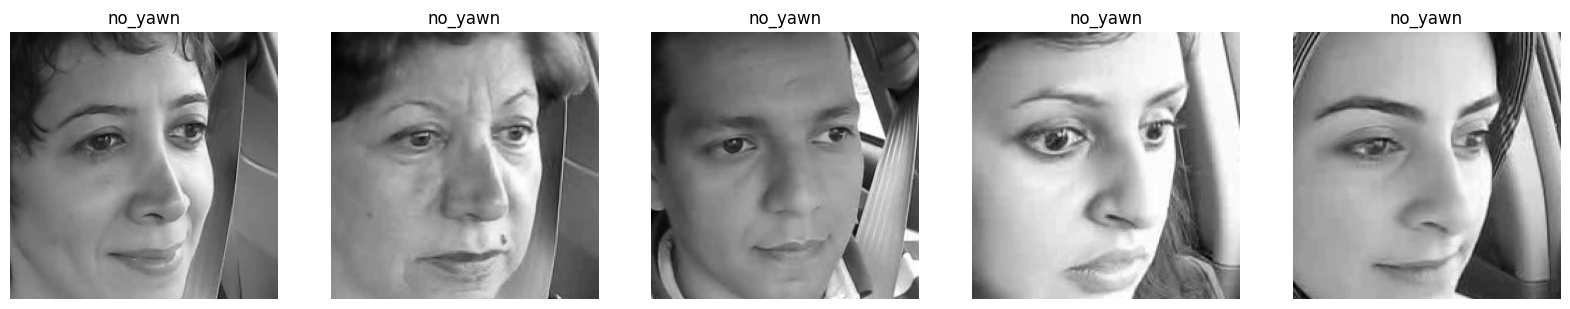

In [18]:
# Detect faces in the images and extract the face region
yawn_faces = []
for img in yawn_gray:
    faces = face_cascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=5, minSize=(100, 100))
    for (x, y, w, h) in faces:
        yawn_faces.append(img[y:y+h, x:x+w])

no_yawn_faces = []
for img in no_yawn_gray:
    faces = face_cascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=5, minSize=(100, 100))
    for (x, y, w, h) in faces:
        no_yawn_faces.append(img[y:y+h, x:x+w])

# Display the first 5 face images
display_images(yawn_faces[:5], ['yawn']*5)
display_images(no_yawn_faces[:5], ['no_yawn']*5)

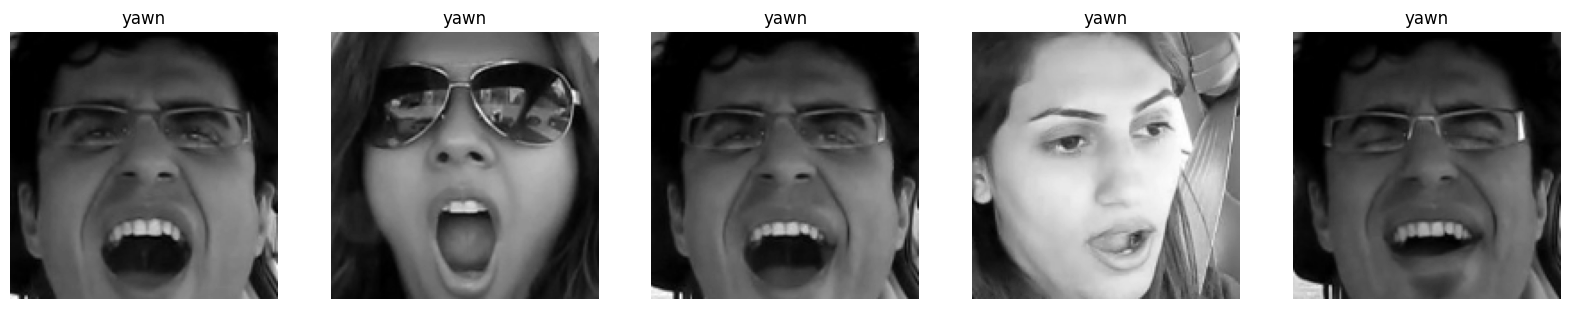

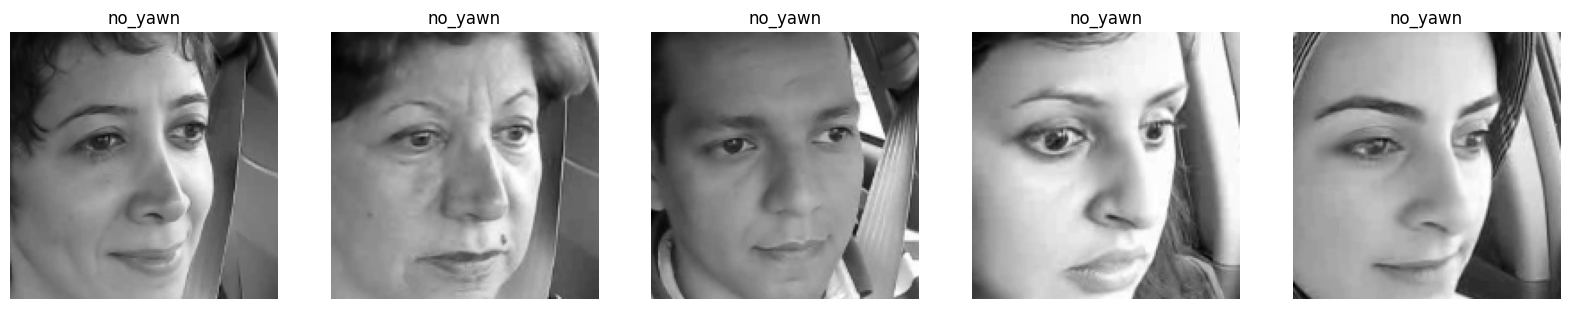

In [19]:
# Resize all the face images to 150x150
yawn_faces_resized = [cv.resize(img, (150, 150)) for img in yawn_faces]
no_yawn_faces_resized = [cv.resize(img, (150, 150)) for img in no_yawn_faces]

# Display all the resized face images
display_images(yawn_faces_resized[:5], ['yawn']*5)
display_images(no_yawn_faces_resized[:5], ['no_yawn']*5)

In [21]:
print('Number of yawn face images:', len(yawn_faces_resized))
print('Number of no yawn face images:', len(no_yawn_faces_resized))

Number of yawn face images: 230
Number of no yawn face images: 209


In [22]:
from sklearn.utils import shuffle

# Convert the images to numpy arrays
yawn_faces_resized = np.array(yawn_faces_resized)
no_yawn_faces_resized = np.array(no_yawn_faces_resized)

# Create the labels
yawn_labels = np.ones(len(yawn_faces_resized))
no_yawn_labels = np.zeros(len(no_yawn_faces_resized))

# Combine the images and labels
X = np.concatenate((yawn_faces_resized, no_yawn_faces_resized))
y = np.concatenate((yawn_labels, no_yawn_labels))

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the images
X_train = X_train / 255
X_test = X_test / 255

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the CNN model
layers = [
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]

model = Sequential(layers)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)

# Convert the predictions to binary
y_pred = np.round(y_pred).flatten()


Epoch 1/10


/home/rasooly/miniconda3/envs/ECS174Project/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 283ms/step - accuracy: 0.5623 - loss: 0.6730 - val_accuracy: 0.7159 - val_loss: 0.5576
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.7450 - loss: 0.5064 - val_accuracy: 0.8182 - val_loss: 0.4103
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - accuracy: 0.7919 - loss: 0.4258 - val_accuracy: 0.8636 - val_loss: 0.3262
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step - accuracy: 0.8641 - loss: 0.3185 - val_accuracy: 0.8977 - val_loss: 0.3176
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step - accuracy: 0.8895 - loss: 0.2875 - val_accuracy: 0.8182 - val_loss: 0.3911
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step - accuracy: 0.8993 - loss: 0.2900 - val_accuracy: 0.8636 - val_loss: 0.5309
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step - accuracy: 0.9168 - loss: 0.2608 - val_accuracy: 0.8977 - val_loss: 0.3030
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - accuracy: 0.9508 - loss: 0.1766 - val_accuracy: 0.9205 - val_

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:', conf_matrix)
print('Classification Report:', class_report)


Accuracy: 0.9204545454545454
Confusion Matrix: [[34  2]
 [ 5 47]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.87      0.94      0.91        36
         1.0       0.96      0.90      0.93        52

    accuracy                           0.92        88
   macro avg       0.92      0.92      0.92        88
weighted avg       0.92      0.92      0.92        88



In [30]:
model.save('models/yawn_detection_model.h5')

In [31]:
yawn_faces_resized[0][0]

array([86, 91, 91, 79, 63, 48, 30, 14,  6,  1,  0,  1,  0,  0,  0,  0,  0,
        0,  2,  2,  2,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  3,  6,  5,  3,  1,  0,
        1,  1,  0,  1,  1,  3,  8, 10, 10, 12, 16, 20, 27, 36],
      dtype=uint8)